# Client analysis

## Imports

In [1]:
import pandas as pd
from random import random
from typing import Iterable, List, Optional, Tuple
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [2]:
pd.set_option('precision', 2)

## Utils

In [3]:
def random_color() -> Tuple[float, float, float]:
    return random(), random(), random()

In [4]:
def sort_it(df: pd.DataFrame, c: str, head_size: Optional[int] = 10) -> pd.DataFrame:
    c_l = c[len("variation_"):]
    df = df[[c, c_l, "name", "id", "date"]].sort_values(by=[c], ascending=False)
    df = df.assign(**{
        "First seen": df.apply(lambda x: min(x["date"]), axis=1).values,
        "Last seen": df.apply(lambda x: max(x["date"]), axis=1).values,
    })
    return df.head(head_size) if head_size else df_

In [5]:
def filter_by_genre(df: pd.DataFrame, genres: Iterable[str]) -> pd.DataFrame:
    genres = set(genres)
    return df[df.genres.apply(lambda x: genres.issubset(set(x)))]

In [6]:
def set_sums(df: pd.DataFrame, sums: Iterable[str]) -> pd.DataFrame:
    for sum_s in sums:
        df = df.assign(**{f"{sum_s}_total": df.apply(lambda x: sum(x[sum_s]), axis=1).values})
    return df

In [7]:
def drop_no_genres(df: pd.DataFrame) -> pd.DataFrame:
    temp = "temp_genres_count"
    df[temp] = df.apply(lambda x: len(x["genres"]), axis=1)
    df = df[df[temp] > 0]
    return df.drop(temp, axis=1)

In [8]:
def format_df(df: pd.DataFrame, c: str) -> pd.DataFrame:
    sep = "<!-!>"
    
    def make_clickable(id_name):
        id_, name = id_name.split(sep)
        return '<a target="_blank" href="https://open.spotify.com/artist/{}">{}</a>'.format(id_, name)

    df = df.assign(**{"id_name": df.apply(lambda x: f"{x['id']}{sep}{x['name']}", axis=1).values})
    df = df.drop(columns=["id", "name", "date", c[len("variation_"):]])
    df = df.rename(columns={"id_name": "name"})
    df = df[["name"] + list(df)[:-1]]
    return df.style.format({'name': make_clickable, c: '{:.2f}%'.format}).hide_index()

In [9]:
def plot_it(df: pd.DataFrame, c: str) -> None:
    def get_sorted_dates(df: pd.DataFrame, r: pd.Series) -> List[datetime]:
        return sorted(datetime.strptime(x, "%Y-%m-%d") for x in r.date)
    
    for _, r in sorted_df.iterrows():
        dates = date2num(get_sorted_dates(df, r))
        plt.plot_date(dates, r[c],'b--', label=r["name"], c=random_color())

    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

## Load data

In [10]:
file_name = "TEST.json"

In [11]:
golden_df = pd.read_json(file_name, lines=True)
golden_df

id                 name  \
0     199f83MfrwCYD58rkf8kYR       Pluviam Forest   
1     1qbdguQmvfReqeUnLezmAx      Robert Elovsson   
2     2P3cjUru4H3fhSXXNxE9kA          Blackstreet   
3     3XsgWn63EnA4wYZBjVyxjf         Ugly Kid Joe   
4     74eX4C98E4FCrAMl39qRsJ  Theory of a Deadman   
...                      ...                  ...   
2242  41MozSoPIsD1dJM0CLPjZF            BLACKPINK   
2243  59KX7XUUgAOOo5IyDjca0T             Verzache   
2244  6t1gpxYbY8OlLA7D2RiikQ          Loud Luxury   
2245  7lAi1Cv19DsukgGjbZQxFg            Annisokay   
2246  7sn4p2ENk9UcN3QdnXAsN2               Ampris   

                                                 genres               sum_pop  \
0                                                    []              [57, 57]   
1                                                    []                 [115]   
2     [boy band, dance pop, hip hop, hip pop, neo so...          [58, 58, 58]   
3     [funk metal, funk rock, glam metal, hard rock,...  [65, 65, 65, 65, 65]   
4     [alternative metal, canadian metal, canadian r...  [61, 61, 61, 61, 61]   
...                                                 ...                   ...   
2242                          [k-pop, k-pop girl group]            [376, 376]   
2243                                      [lo-fi beats]              [51, 51]   
2244  [dance pop, edm, electro house, pop, pop dance...              [75, 75]   
2245  [german metalcore, german post-hardcore, metal...              [54, 54]   
2246                                                 []              [68, 68]   

            count_pop                         avg_pop  \
0              [1, 1]                    [57.0, 57.0]   
1                 [2]                          [57.5]   
2           [1, 1, 1]              [58.0, 58.0, 58.0]   
3     [1, 1, 1, 1, 1]  [65.0, 65.0, 65.0, 65.0, 65.0]   
4     [1, 1, 1, 1, 1]  [61.0, 61.0, 61.0, 61.0, 61.0]   
...               ...                             ...   
2242           [5, 5]                    [75.2, 75.2]   
2243           [1, 1]                    [51.0, 51.0]   
2244           [1, 1]                    [75.0, 75.0]   
2245           [1, 1]                    [54.0, 54.0]   
2246           [1, 1]                    [68.0, 68.0]   

                                          followers  \
0                                            [1, 1]   
1                                             [481]   
2                          [524990, 524990, 524990]   
3          [132208, 132208, 132208, 132208, 132208]   
4     [1432295, 1432295, 1432295, 1432295, 1432295]   
...                                             ...   
2242                           [17118762, 17118762]   
2243                               [157784, 157784]   
2244                               [390120, 390120]   
2245                                 [72465, 72465]   
2246                                     [433, 433]   

                                                   date  variation_sum_pop  \
0                              [2020-06-01, 2020-05-01]                0.0   
1                                          [2020-10-01]                0.0   
2                  [2020-01-01, 2020-07-01, 2020-04-01]                0.0   
3     [2020-07-01, 2020-12-01, 2020-09-01, 2020-01-0...                0.0   
4     [2020-07-01, 2020-01-01, 2020-09-01, 2020-12-0...                0.0   
...                                                 ...                ...   
2242                           [2020-08-01, 2020-02-01]                0.0   
2243                           [2020-08-01, 2020-02-01]                0.0   
2244                           [2020-02-01, 2020-08-01]                0.0   
2245                           [2020-08-01, 2020-02-01]                0.0   
2246                           [2020-08-01, 2020-02-01]                0.0   

      variation_count_pop  variation_avg_pop  variation_followers  
0                     0.0                0.0                  0.0

## Preprocessing

In [12]:
df = drop_no_genres(golden_df)

In [13]:
df = set_sums(df, ["sum_pop", "count_pop", "avg_pop"])

In [14]:
df = filter_by_genre(df, [])

In [15]:
df

id                 name  \
2     2P3cjUru4H3fhSXXNxE9kA          Blackstreet   
3     3XsgWn63EnA4wYZBjVyxjf         Ugly Kid Joe   
4     74eX4C98E4FCrAMl39qRsJ  Theory of a Deadman   
6     1MIVXf74SZHmTIp4V4paH4                Mabel   
9     6jmHuLfbWlq34KedQ7mA5I          Slow Motion   
...                      ...                  ...   
2241  5MbNzCW3qokGyoo9giHA3V            EARTHGANG   
2242  41MozSoPIsD1dJM0CLPjZF            BLACKPINK   
2243  59KX7XUUgAOOo5IyDjca0T             Verzache   
2244  6t1gpxYbY8OlLA7D2RiikQ          Loud Luxury   
2245  7lAi1Cv19DsukgGjbZQxFg            Annisokay   

                                                 genres               sum_pop  \
2     [boy band, dance pop, hip hop, hip pop, neo so...          [58, 58, 58]   
3     [funk metal, funk rock, glam metal, hard rock,...  [65, 65, 65, 65, 65]   
4     [alternative metal, canadian metal, canadian r...  [61, 61, 61, 61, 61]   
6     [dance pop, pop, pop dance, post-teen pop, tro...    [87, 234, 234, 87]   
9                                          [relaxative]              [79, 79]   
...                                                 ...                   ...   
2241  [atl hip hop, hip hop, psychedelic hip hop, ra...              [60, 60]   
2242                          [k-pop, k-pop girl group]            [376, 376]   
2243                                      [lo-fi beats]              [51, 51]   
2244  [dance pop, edm, electro house, pop, pop dance...              [75, 75]   
2245  [german metalcore, german post-hardcore, metal...              [54, 54]   

            count_pop                         avg_pop  \
2           [1, 1, 1]              [58.0, 58.0, 58.0]   
3     [1, 1, 1, 1, 1]  [65.0, 65.0, 65.0, 65.0, 65.0]   
4     [1, 1, 1, 1, 1]  [61.0, 61.0, 61.0, 61.0, 61.0]   
6        [1, 3, 3, 1]        [87.0, 78.0, 78.0, 87.0]   
9              [1, 1]                    [79.0, 79.0]   
...               ...                             ...   
2241           [1, 1]                    [60.0, 60.0]   
2242           [5, 5]                    [75.2, 75.2]   
2243           [1, 1]                    [51.0, 51.0]   
2244           [1, 1]                    [75.0, 75.0]   
2245           [1, 1]                    [54.0, 54.0]   

                                          followers  \
2                          [524990, 524990, 524990]   
3          [132208, 132208, 132208, 132208, 132208]   
4     [1432295, 1432295, 1432295, 1432295, 1432295]   
6              [1055264, 1055264, 1055264, 1055264]   
9                                    [10414, 10414]   
...                                             ...   
2241                               [506407, 506407]   
2242                           [17118762, 17118762]   
2243                               [157784, 157784]   
2244                               [390120, 390120]   
2245                                 [72465, 72465]   

                                                   date  variation_sum_pop  \
2                  [2020-01-01, 2020-07-01, 2020-04-01]               0.00   
3     [2020-07-01, 2020-12-01, 2020-09-01, 2020-01-0...               0.00   
4     [2020-07-01, 2020-01-01, 2020-09-01, 2020-12-0...               0.00   
6      [2020-03-01, 2020-02-01, 2020-08-01, 2020-11-01]             -62.82   
9                              [2020-08-01, 2020-02-01]               0.00   
...                                                 ...                ...   
2241                           [2020-05-01, 2020-10-01]               0.00   
2242                           [2020-08-01, 2020-02-01]               0.00   
2243                           [2020-08-01, 2020-02-01]               0.00   
2244                           [2020-02-01, 2020-08-01]               0.00   
2245                           [2020-08-01, 2020-02-01]               0.00   

      variation_count_pop  variation_avg_pop  variation_followers  \
2                    0.00               0.00                  0.

## Processing

### Evolution of popularity sum

In [16]:
c = "variation_sum_pop"
sorted_df = sort_it(df, c)
format_df(sorted_df, c)

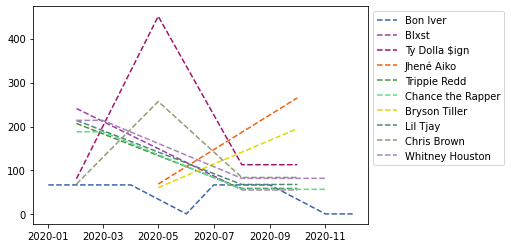

In [17]:
plot_it(sorted_df, "sum_pop")

### Evolution of popularity occurences

In [18]:
c = "variation_count_pop"
sorted_df = sort_it(df, c)
format_df(sorted_df, c)

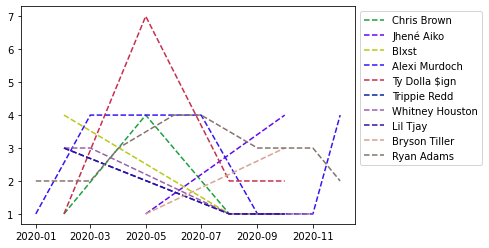

In [19]:
plot_it(sorted_df, "count_pop")

### Evolution of popularity average score

In [20]:
c = "variation_avg_pop"
sorted_df = sort_it(df, c)
format_df(sorted_df, c)

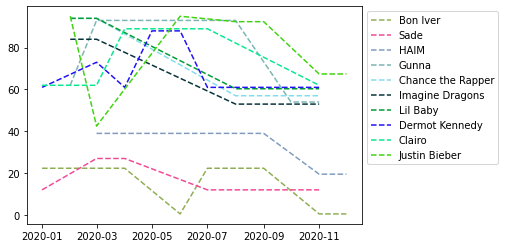

In [21]:
plot_it(sorted_df, "avg_pop")